In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from config import akey

In [2]:
ticker_csv = "api-data/stocks.csv"
small_cap = pd.read_csv(ticker_csv)
small_cap = small_cap.dropna(how='any')
stocks = small_cap['Ticker'].tolist()
small_cap.head()

,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,Aaron's Company Inc,AAN,00258W10,BLFGN99,0.070124,Consumer Discretionary,51008,USD
1,Applied Optoelectronics Inc.,AAOI,03823U10,BDW0D09,0.018457,Information Technology,30658,USD
2,AAON Inc.,AAON,36020,2268130,0.303639,Industrials,62025,USD
3,American Assets Trust Inc.,AAT,2401310,B3NTLD4,0.171299,Real Estate,76242,USD
4,Atlas Air Worldwide Holdings Inc.,AAWW,4916420,B01Z8P4,0.171077,Industrials,39926,USD


In [3]:
sp = SectorPerformances(key=akey, output_format='pandas')
data, meta_data = sp.get_sector()
data.to_csv('api-data/sector_performance.csv')
data

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Consumer Discretionary,0.0069,0.0105,0.0057,0.0274,0.0611,0.2966,0.3274,0.6467,1.0616,3.3581
Information Technology,0.0062,0.0161,-0.0004,0.0457,0.0995,0.3819,0.4210,1.0118,2.0743,4.5129
Energy,0.0006,0.0192,0.0035,0.1834,0.2291,-0.3401,-0.3175,-0.4086,-0.3257,-0.3868
Consumer Staples,0.0003,0.0023,-0.0071,-0.0048,0.0366,0.0657,0.0753,0.1850,0.3523,1.2879
Health Care,-0.0010,0.0107,-0.0063,-0.0026,0.0564,0.0958,0.1189,0.3584,0.5974,2.5664
Communication Services,-0.0013,0.0070,-0.0024,0.0394,0.1188,0.2197,0.2428,0.3619,0.5122,0.7400
Financials,-0.0019,0.0168,-0.0058,0.0564,0.1421,-0.0739,-0.0670,0.0339,0.5012,1.2615
Real Estate,-0.0030,0.0173,-0.0063,-0.0266,0.0040,-0.0595,-0.0245,0.1004,NaN,NaN
Materials,-0.0039,0.0188,-0.0062,0.0307,0.0792,0.1573,0.1827,0.2117,0.6453,0.9317
Industrials,-0.0066,0.0137,-0.0039,0.0348,0.1300,0.0887,0.0909,0.1968,0.6325,1.5170


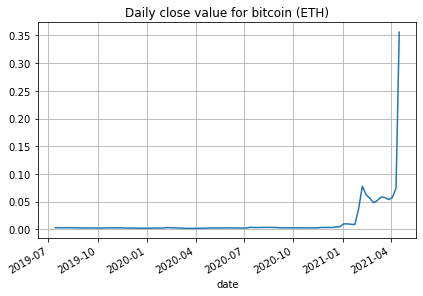

In [5]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt
coins = ['BTC','ETH','DOGE']
cc = CryptoCurrencies(key="1HRMY84YYEJF5HNJ", output_format='pandas')
data, meta_data = cc.get_digital_currency_weekly(symbol='DOGE', market='EUR')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (ETH)')
plt.grid()
plt.show()

In [12]:
data.head(200)

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-04-17,51196.165907,61334.81,51534.411388,61740.04,51011.972658,61114.14,51154.898339,61285.37,1992.888167,1992.888167
2021-04-16,52718.600278,63158.74,53020.653167,63520.61,50082.000000,60000.00,51196.157560,61334.80,91764.139884,91764.139884
2021-04-15,52552.319691,62959.53,53253.860000,63800.00,51768.094000,62020.00,52719.635306,63159.98,51649.700340,51649.700340
2021-04-14,53066.060847,63575.01,54133.633800,64854.00,51167.944700,61301.00,52552.319691,62959.53,82616.343993,82616.343993
2021-04-13,49965.150347,59860.01,53235.304619,63777.77,49919.358705,59805.15,53066.052500,63575.00,82848.688746,82848.688746
...,...,...,...,...,...,...,...,...,...,...
2020-10-04,8799.465829,10542.07,8928.677389,10696.87,8779.266089,10517.87,8903.436061,10666.63,23212.001595,23212.001595
2020-10-03,8823.112880,10570.40,8850.791532,10603.56,8761.395162,10496.46,8799.457482,10542.06,22298.221341,22298.221341
2020-10-02,8863.787811,10619.13,8901.775008,10664.64,8659.177800,10374.00,8823.112880,10570.40,50130.393705,50130.393705
